# Matplolib Visualization part 1

## Loading Libraries and the dataset checkup

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from datetime import datetime as dt

In [2]:
import matplotlib
matplotlib.__version__

'3.10.7'

In [3]:
from dotenv import load_dotenv 
import os  
load_dotenv() 

True

In [34]:
load_dotenv()

SAVE_PATH = os.getenv("SAVE_PATH")


In [ ]:
# Get the full file path from .env
citibike_weather_path = os.getenv("CITIBIKE_2022_WEATHER")

# Read the CSV directly
citibike_weather_df = pd.read_csv(citibike_weather_path)

citibike_weather_df.head()

In [5]:
# converting the date Object to datetime
citibike_weather_df["date"] = pd.to_datetime(citibike_weather_df["date"])


In [10]:
citibike_weather_df.dtypes

date                  datetime64[ns]
month                          int64
weekday                       object
tavg                         float64
prcp                         float64
ride_id                       object
member_casual                 object
rideable_type                 object
started_at                    object
ended_at                      object
duration                      object
start_hour                     int64
end_hour                       int64
start_station_name            object
start_station_id              object
end_station_name              object
end_station_id                object
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
dtype: object

## Monthly Temperature & Percepitation in New York 2022

<Axes: title={'center': 'Monthly Average Temperature in 2022'}, xlabel='date'>

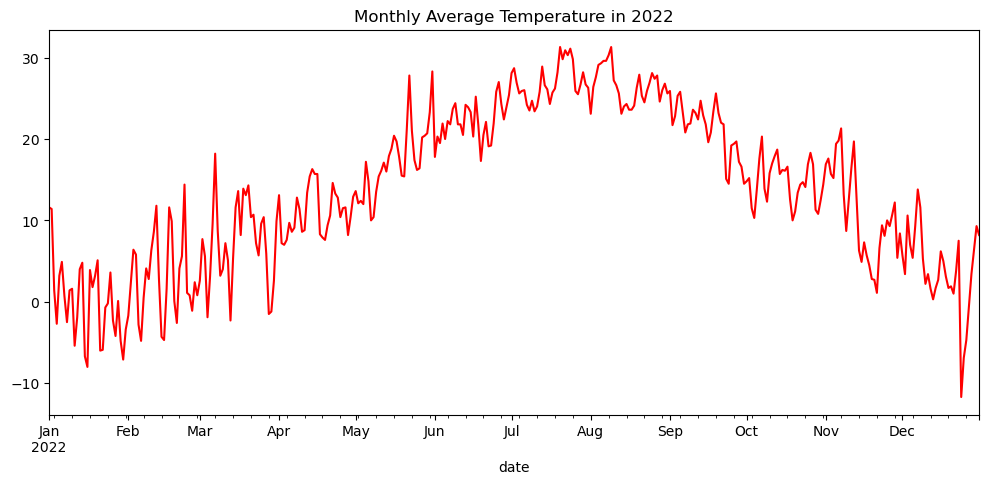

In [26]:
# 1. Time‑series line plot of tavg using pandas only
citibike_weather_df["tavg"].plot(
    figsize=(12,5),
    title="Daily Average Temperature in 2022",
    color="red"
)

<Axes: title={'center': 'Daily Precipitation in 2022'}, xlabel='date'>

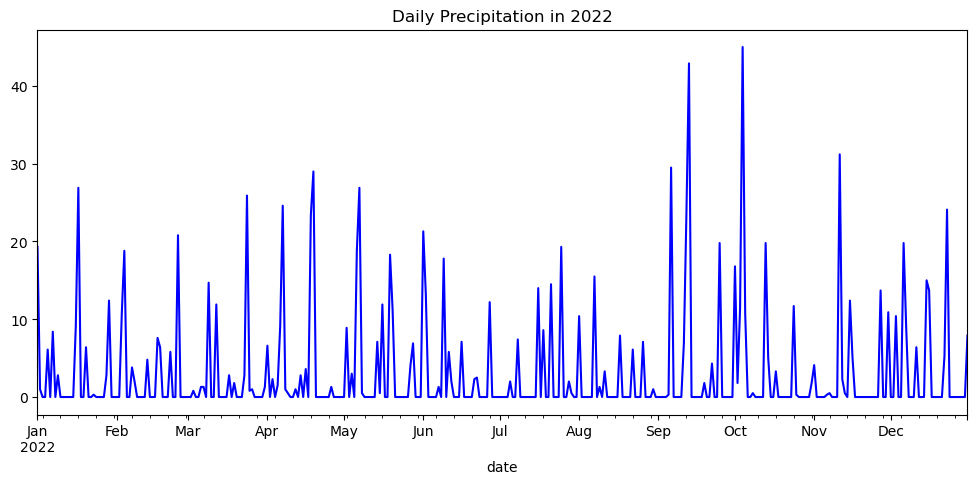

In [28]:
# Time‑series line plot of prcp using pandas only
citibike_weather_df["prcp"].plot(
    figsize=(12,5),
    title="Daily Precipitation in 2022",
    color="blue"
)


## Daily Rides Numbers with Temperature 

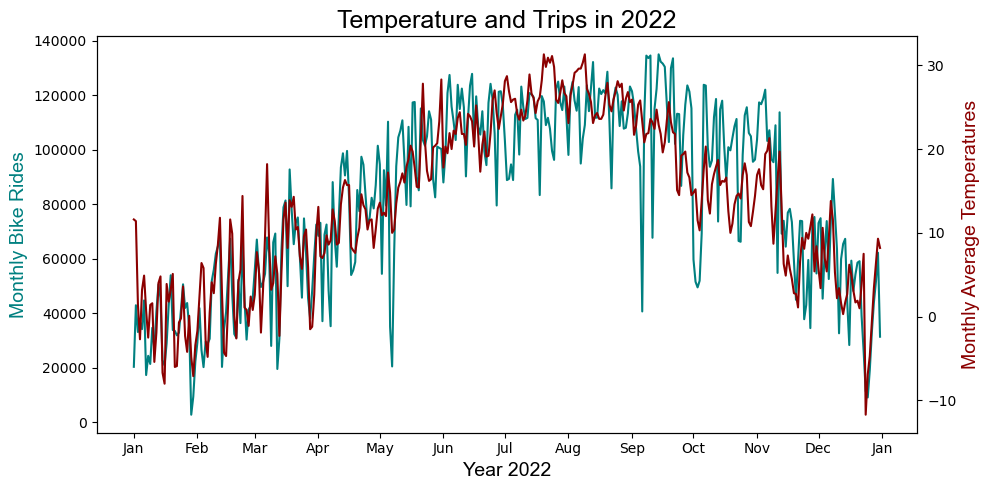

In [35]:
fig, ax = plt.subplots(figsize=(10, 5))

# Plot bike rides
ax.plot(citibike_weather_df['ride_count'], color="teal")
ax.set_xlabel("Year 2022", fontname="Arial", fontsize=14)
ax.set_ylabel("Daily Bike Rides", color="teal", fontname="Arial", fontsize=14)

# Second axis for temperature
ax2 = ax.twinx()
ax2.plot(citibike_weather_df["tavg"], color="darkred")
ax2.set_ylabel("Daily Average Temperatures", color="darkred", fontname="Arial", fontsize=14)
plt.title("Temperature and Trips in 2022", fontname="Arial", fontsize=18)

# --- Force x-axis to show every month ---
import matplotlib.dates as mdates
if hasattr(df_grouped.index, "dtype") and "datetime" in str(df_grouped.index.dtype):
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
else:
    # If index is not datetime (e.g., 0–11)
    ax.set_xticks(range(len(citibike_weather_df)))
    ax.set_xticklabels(citibike_weather_df.index)
# Save graph
save_path = os.path.join(SAVE_PATH, "Temperature and Trips in 2022.png")
plt.savefig(save_path, dpi=600)

plt.tight_layout()
plt.show()


#### Figure 1: Temperature and Trips in 2022
Line plot over the month of 2022 demonstrates a high correlation between number of bike rides and average temperatures. There is increasing rides trend from spring until early Autumn that goes back down in the winter. This Trend is expected and here is validated.

Illustration code is written by using the Object‑Oriented (OO) approach with twin axis.

## Daily Rides Numbers with Percepitation 

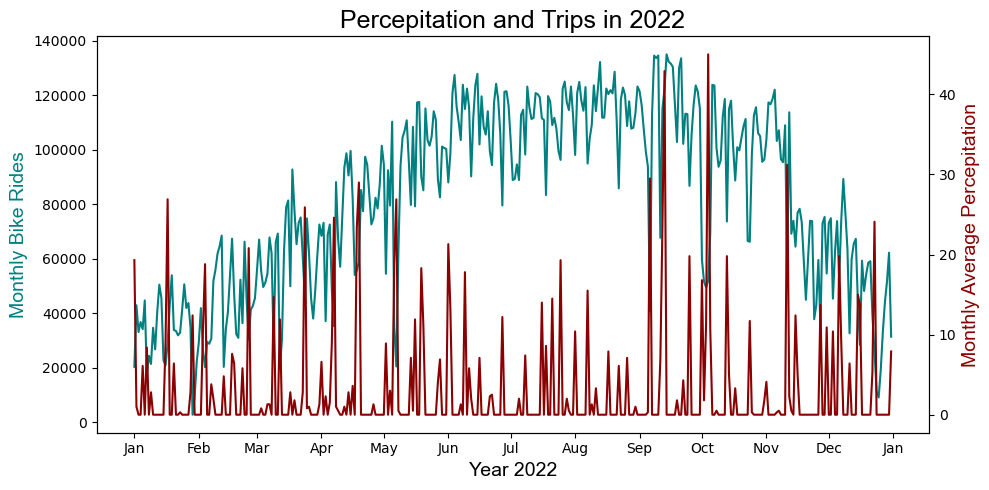

In [36]:
fig, ax = plt.subplots(figsize=(10, 5))

# Plot bike rides
ax.plot(citibike_weather_df['ride_count'], color="teal")
ax.set_xlabel("Year 2022", fontname="Arial", fontsize=14)
ax.set_ylabel("Daliy Bike Rides", color="teal", fontname="Arial", fontsize=14)

# Second axis for percepitation
ax2 = ax.twinx()
ax2.plot(citibike_weather_df["prcp"], color="darkred")
ax2.set_ylabel("Daily Average Percepitation", color="darkred", fontname="Arial", fontsize=14)
plt.title("Percepitation and Trips in 2022", fontname="Arial", fontsize=18)

# --- Force x-axis to show every month ---
import matplotlib.dates as mdates
if hasattr(citibike_weather_df.index, "dtype") and "datetime" in str(df_grouped.index.dtype):
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
else:
    # If index is not datetime (e.g., 0–11)
    ax.set_xticks(range(len(citibike_weather_df)))
    ax.set_xticklabels(citibike_weather_df.index)
# Save graph
save_path = os.path.join(SAVE_PATH, "Percepitation and Trips in 2022.png")
plt.savefig(save_path, dpi=600)

plt.tight_layout()
plt.show()


#### Figure 2: Percepitation and Trips in 2022
Line plot over the month of 2022 shows no observable correlation between number of bike rides and average Percepitation. a dily correlation might exist.

## Ride duration Histogramm

In [14]:
citibike_weather_df["duration"].describe()

count                   29838166
unique                   3384866
top       0 days 00:04:55.922000
freq                          59
Name: duration, dtype: object

In [15]:
# 1. Convert the column to a proper timedelta
citibike_weather_df["duration"] = pd.to_timedelta(citibike_weather_df["duration"])

In [16]:
citibike_weather_df["duration"].describe()

count                     29838166
mean     0 days 00:18:12.577042067
std      0 days 04:21:26.911401656
min       -1 days +23:02:42.665000
25%         0 days 00:05:47.804000
50%         0 days 00:10:09.720000
75%         0 days 00:17:59.940000
max       280 days 21:21:00.352000
Name: duration, dtype: object

In [17]:
# Find negative durations
citibike_weather_df[citibike_weather_df["duration"] < pd.Timedelta(0)]

,date,month,weekday,tavg,prcp,ride_id,member_casual,rideable_type,started_at,ended_at,...,start_hour,end_hour,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng
26439062,2022-11-06,11,Sunday,19.8,0.3,F06569EEA2D24E42,member,electric_bike,2022-11-06 01:47:56.279,2022-11-06 01:31:39.722,...,1,1,McKibbin St & Manhattan Ave,4996.08,Stagg St & Union Ave,5117.05,40.705091,-73.944050,40.708771,-73.950953
26439389,2022-11-06,11,Sunday,19.8,0.3,91943C393E97E6F3,member,electric_bike,2022-11-06 01:52:53.153,2022-11-06 01:06:44.784,...,1,1,27 St & Hunter St,6310.06,3 Ave & E 71 St,6960.1,40.748637,-73.941193,40.768737,-73.961199
26439452,2022-11-06,11,Sunday,19.8,0.3,638616008C76D799,member,classic_bike,2022-11-06 01:53:06.710,2022-11-06 01:03:22.737,...,1,1,MacDougal St & Washington Sq,5797.01,Broadway & W 29 St,6289.06,40.732264,-73.998522,40.746201,-73.988557
26439606,2022-11-06,11,Sunday,19.8,0.3,62DD296C7D079982,casual,classic_bike,2022-11-06 01:49:40.587,2022-11-06 01:10:46.890,...,1,1,W 48 St & Rockefeller Plaza,6626.11,E 13 St & 2 Ave,5820.08,40.757769,-73.979294,40.731539,-73.985302
26439834,2022-11-06,11,Sunday,19.8,0.3,5E35A07A042B95B4,member,electric_bike,2022-11-06 01:46:34.082,2022-11-06 01:06:48.622,...,1,1,E 2 St & Avenue A,5553.1,W 50 St & 10 Ave,6890.06,40.723236,-73.986018,40.764734,-73.991944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26541264,2022-11-06,11,Sunday,19.8,0.3,422F7E607DA646C7,casual,electric_bike,2022-11-06 01:51:50.792,2022-11-06 01:27:26.033,...,1,1,Fulton St & Broadway,5175.08,Halsey St & Tompkins Ave,4319.07,40.711339,-74.009573,40.682369,-73.944118
26541399,2022-11-06,11,Sunday,19.8,0.3,635128207CABEFD0,member,electric_bike,2022-11-06 01:40:42.383,2022-11-06 01:10:41.752,...,1,1,E 11 St & 1 Ave,5746.14,West Drive & Prospect Park West,3651.04,40.729665,-73.984653,40.661063,-73.979453
26541447,2022-11-06,11,Sunday,19.8,0.3,1DD07EC913A88CAF,member,classic_bike,2022-11-06 01:44:46.082,2022-11-06 01:12:03.242,...,1,1,Duffield St & Willoughby St,4596.05,1 Ave & E 6 St,5626.15,40.692216,-73.984284,40.726331,-73.986169
26541781,2022-11-06,11,Sunday,19.8,0.3,6744413FAA9A21B1,member,classic_bike,2022-11-06 01:58:29.579,2022-11-06 01:05:39.611,...,1,1,Lafayette St & E 8 St,5788.13,Lafayette St & E 8 St,5788.13,40.730207,-73.991026,40.730207,-73.991026


In [18]:
#Find extremely long durations
citibike_weather_df[citibike_weather_df["duration"] > pd.Timedelta(hours=2)]

,date,month,weekday,tavg,prcp,ride_id,member_casual,rideable_type,started_at,ended_at,...,start_hour,end_hour,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng
39,2022-01-01,1,Saturday,11.6,19.3,A22155E83C861941,casual,electric_bike,2022-01-01 12:41:30.075,2022-01-01 15:22:31.143,...,12,15,31 St & 23 Ave,7144.01,23 Ave & 27 St,7178.02,40.774788,-73.912555,40.776165,-73.915318
42,2022-01-01,1,Saturday,11.6,19.3,D9FBC060EABA0ABA,casual,electric_bike,2022-01-01 12:38:35.581,2022-01-01 15:22:40.816,...,12,15,31 St & 23 Ave,7144.01,23 Ave & 27 St,7178.02,40.774788,-73.912555,40.776165,-73.915318
300,2022-01-01,1,Saturday,11.6,19.3,DC1583CE69237E94,casual,classic_bike,2022-01-01 13:37:08.366,2022-01-01 16:21:43.629,...,13,16,W 41 St & 8 Ave,6602.03,6 Ave & W 45 St,6593.15,40.756405,-73.990026,40.756951,-73.982631
839,2022-01-01,1,Saturday,11.6,19.3,95754E05C8FB4287,casual,classic_bike,2022-01-01 01:40:28.204,2022-01-01 14:13:04.420,...,1,14,W 41 St & 8 Ave,6602.03,E 54 St & 1 Ave,6608.09,40.756405,-73.990026,40.756265,-73.964179
898,2022-01-01,1,Saturday,11.6,19.3,8D261C00254D883B,casual,electric_bike,2022-01-01 19:33:21.095,2022-01-02 01:58:12.826,...,19,1,W 17 St & 8 Ave,6148.02,5 Ave & E 29 St,6248.06,40.741776,-74.001497,40.745168,-73.986831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29836979,2022-12-31,12,Saturday,8.2,7.9,45DBB667FF7C2BCC,casual,classic_bike,2022-12-31 10:48:09.053,2022-12-31 13:04:52.360,...,10,13,Centre St & Chambers St,5207.01,Vesey St & Church St,5216.06,40.712733,-74.004607,40.712220,-74.010472
29837167,2022-12-31,12,Saturday,8.2,7.9,BEAB7FA8FA0A7A4E,casual,electric_bike,2022-12-31 12:53:20.360,2022-12-31 17:11:57.171,...,12,17,W 35 St & 9 Ave,6569.09,W 70 St & Amsterdam Ave,7207.08,40.754145,-73.996089,40.777480,-73.982886
29837242,2022-12-31,12,Saturday,8.2,7.9,D47FE89E7E3B1C5A,member,classic_bike,2022-12-31 12:39:07.170,2022-12-31 18:32:57.391,...,12,18,W 74 St & Columbus Ave,7230.1,W 70 St & Amsterdam Ave,7207.08,40.778567,-73.977550,40.777480,-73.982886
29837368,2022-12-31,12,Saturday,8.2,7.9,1D54CC98502BA78B,casual,classic_bike,2022-12-31 09:36:42.923,2022-12-31 11:49:21.653,...,9,11,Stuyvesant Walk & 1 Av Loop,5854.1,Stuyvesant Walk & 1 Av Loop,5854.1,40.732340,-73.978984,40.732340,-73.978984


#### Note: 

there are Negative and extremly long durations found due to some szstem mistakes in registerin gthe times or due to not switched of bikes. 
however, those are still valid rides that i want to keep in the table without cleaning.
therefore, i decided to create new df for the duration, clean it and then plot the Histogramm.

In [19]:
duration_df = citibike_weather_df[["duration"]].copy()
# Remove negative durations:
duration_df = duration_df[duration_df["duration"] >= pd.Timedelta(0)]
# Remove extremely long durations:
duration_df = duration_df[duration_df["duration"] <= pd.Timedelta(hours=2)]


In [20]:
duration_df["duration_min"] = duration_df["duration"].dt.total_seconds() / 60


In [21]:
duration_df.head()

,duration,duration_min
0,0 days 00:03:49.904000,3.831733
1,0 days 00:24:53.156000,24.885933
2,0 days 00:11:46.612000,11.776867
3,0 days 00:25:19.373000,25.322883
4,0 days 00:03:15.535000,3.258917


In [22]:
duration_df["duration"].describe()

count                     29668471
mean     0 days 00:14:00.777441831
std      0 days 00:12:53.429057190
min         0 days 00:00:08.930000
25%         0 days 00:05:46.516000
50%         0 days 00:10:06.101000
75%         0 days 00:17:47.712000
max         0 days 01:59:59.975000
Name: duration, dtype: object

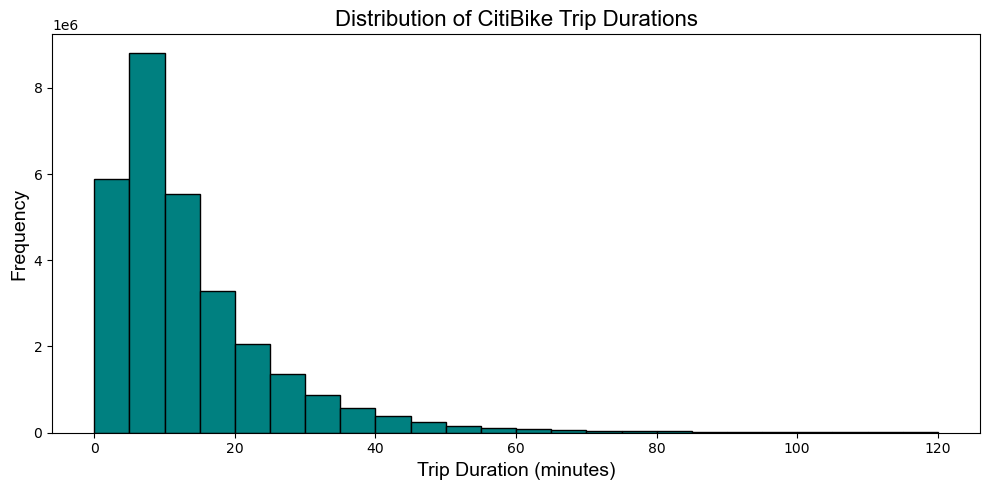

In [37]:
# Ploting histogram of the duration frequency
#Extract the cleaned numeric series
x = duration_df["duration_min"]

# Create bins every 10 minutes from 0 to 120 (based on the describe table)
bins = np.arange(0, 125, 5) # 0, 10, 20, ..., 120

# Force x-axis ticks every 10 minutes 
xticks = np.arange(0, 130, 10) # 0, 10, 20, ..., 120 plt.xticks(xticks)

plt.figure(figsize=(10,5))
plt.hist(duration_df["duration_min"], bins=bins, color="teal", edgecolor="black")
plt.xlabel("Trip Duration (minutes)",fontname="Arial", fontsize=14)
plt.ylabel("Frequency",fontname="Arial", fontsize=14)
plt.title("Distribution of CitiBike Trip Durations",fontname="Arial", fontsize=16)

# Save graph
save_path = os.path.join(SAVE_PATH, "Histogram CitiBike Trip Durations.png")
plt.savefig(save_path, dpi=600)

plt.tight_layout()
plt.show()


#### Figure 4:
Histogram ploting the frequency of trip durations shows that the majority is between 5 to 10 minutes journies while long journies are lower.

## Number of member vs. casual & Bike_type subplots

In [41]:
# Aggregate counts
usertype_percent = citibike_weather_df["member_casual"].value_counts(normalize=True) * 100

rideable_counts = citibike_weather_df["rideable_type"].value_counts()

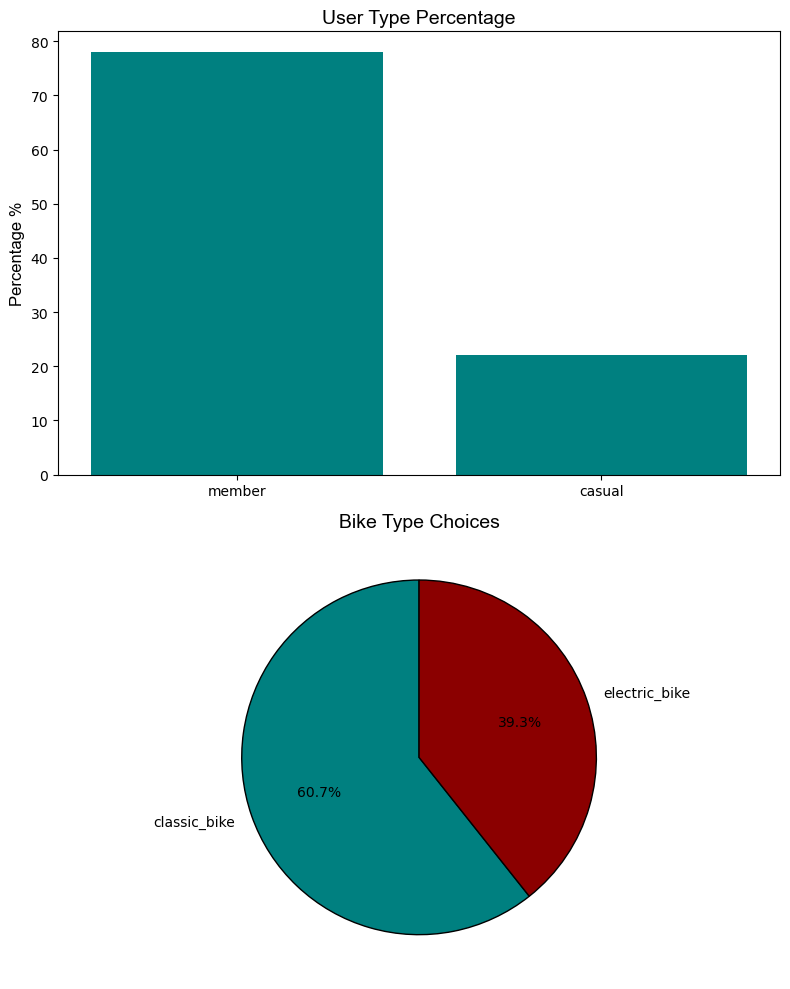

In [45]:
# Create figure with 2 subplots (two separate axes)
fig, ax = plt.subplots(2, 1, figsize=(8, 10))

# --- Bar chart on ax[0] ---
ax[0].bar(usertype_percent.index, usertype_percent.values, color="teal")
ax[0].set_title("User Type Percentage",fontname="Arial", fontsize=14)
ax[0].set_ylabel("Percentage %",fontname="Arial", fontsize=12)

# --- Pie chart on ax[1] ---
# Custom colors for pie slices
pie_colors = ["teal", "darkred"]

# Plot pie with separator lines (wedgeprops) and frame (ax.spines)
ax[1].pie(
    rideable_counts.values,
    labels=rideable_counts.index,
    autopct="%1.1f%%",
    startangle=90,
    colors=pie_colors,
    wedgeprops={"edgecolor": "black", "linewidth": 1}   # separator lines
)

# Add a frame around the pie chart
for spine in ax[1].spines.values():
    spine.set_visible(True)
    spine.set_edgecolor("black")
    spine.set_linewidth(1.5)

ax[1].set_title("Bike Type Choices",fontname="Arial", fontsize=14)

# Save graph
save_path = os.path.join(SAVE_PATH, "User Type and Bike Type Choices.png")
plt.savefig(save_path, dpi=600)

plt.tight_layout()
plt.show()


#### Figure 4:
User Type Percentage shows almost 80% of users as members. this is good for the company and strategies should be set to keep them happy.

Bike choice pie distribution shows 60% of users prefer classic bikes.

Would be interesting to see who among the users prefer more classic than electric.
also, when there i shigher demand on electric? rainy days? or weekends?


In [52]:
# Bike type percentages
bike_pct = citibike_weather_df["rideable_type"].value_counts(normalize=True) * 100

# Electric bike user type %
electric_df = citibike_weather_df[citibike_weather_df["rideable_type"] == "electric_bike"]
user_pct_electric = electric_df["member_casual"].value_counts(normalize=True) * 100

# Classic bike user type %
classic_df = citibike_weather_df[citibike_weather_df["rideable_type"] == "classic_bike"]
user_pct_classic = classic_df["member_casual"].value_counts(normalize=True) * 100


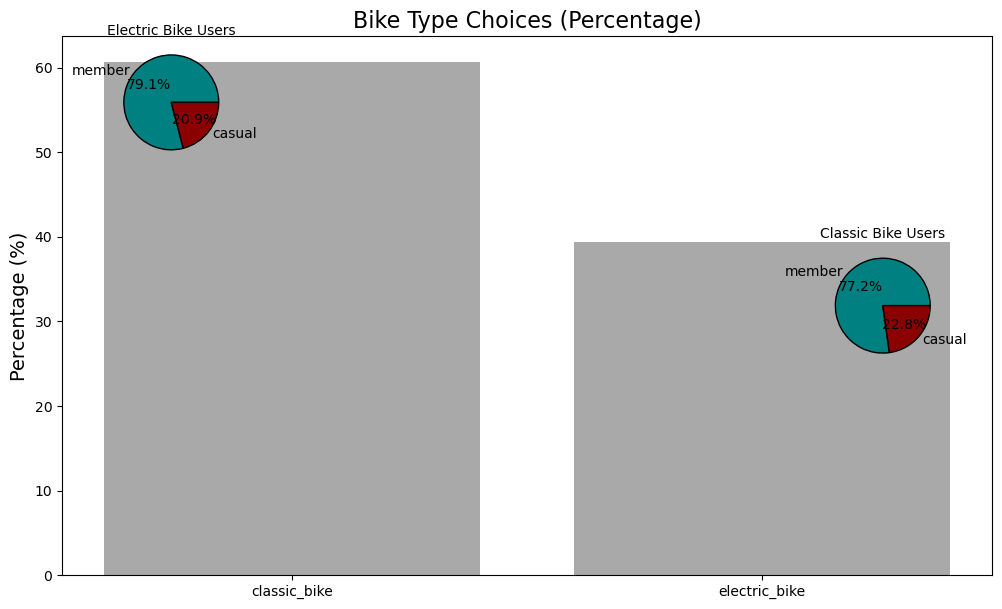

In [54]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

fig, ax = plt.subplots(figsize=(12, 7))

# --- Main bar chart ---
ax.bar(
    bike_pct.index,
    bike_pct.values,
    color=["darkgrey", "darkgrey", "gray"]
)
ax.set_title("Bike Type Choices (Percentage)", fontsize=16)
ax.set_ylabel("Percentage (%)", fontsize=14)

# --- Inset pie 1: Electric bike users ---
inset_elec = inset_axes(ax, width="22%", height="22%", loc="upper left")

inset_elec.pie(
    user_pct_electric.values,
    labels=user_pct_electric.index,
    autopct="%1.1f%%",
    colors=["teal", "darkred"],
    wedgeprops={"edgecolor": "black", "linewidth": 1}
)
inset_elec.set_title("Electric Bike Users", fontsize=10)

# --- Inset pie 2: Classic bike users ---
inset_classic = inset_axes(ax, width="22%", height="22%", loc="center right")

inset_classic.pie(
    user_pct_classic.values,
    labels=user_pct_classic.index,
    autopct="%1.1f%%",
    colors=["teal", "darkred"],
    wedgeprops={"edgecolor": "black", "linewidth": 1}
)
inset_classic.set_title("Classic Bike Users", fontsize=10)

# Save graph
save_path = os.path.join(SAVE_PATH, "User Type and Bike Type Choices.png")
plt.savefig(save_path, dpi=600)

plt.show()


#### Figure 5:
combined bar and pie charts show no difference between the user type percentage that chose electric vs. classic bike. always the majority of both bike type are the members with over 77%.
